/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


(300, 400, 3)


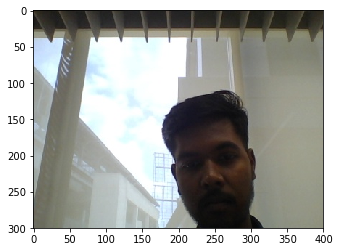

(300, 400, 3)


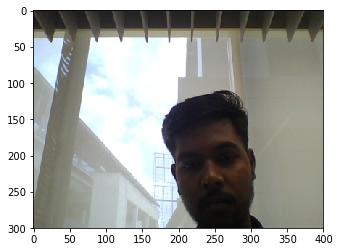

(300, 400, 3)


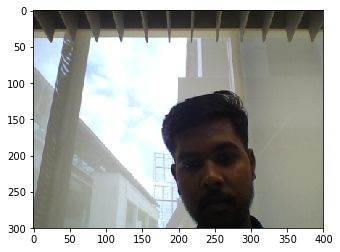

(300, 400, 3)


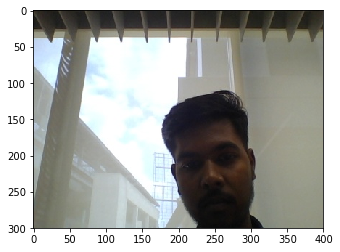

(300, 400, 3)


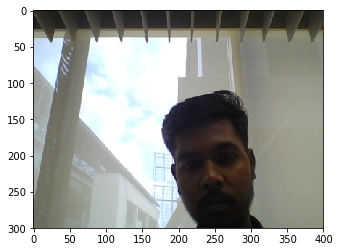

(300, 400, 3)


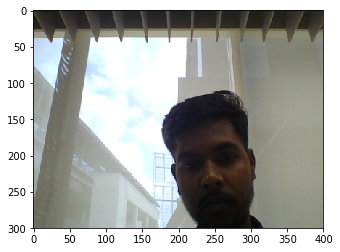

(300, 400, 3)


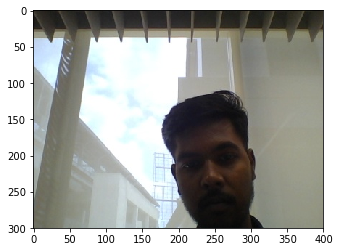

(300, 400, 3)


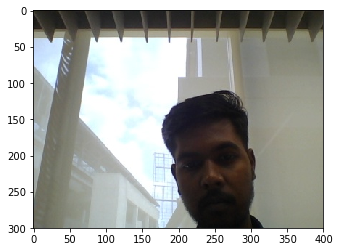

(300, 400, 3)


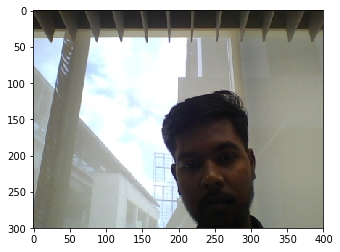

(300, 400, 3)


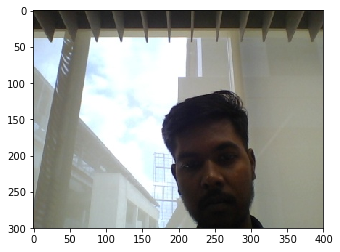

(300, 400, 3)


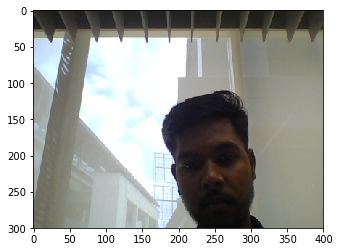

(300, 400, 3)


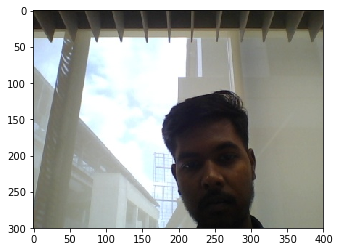

(300, 400, 3)


In [ ]:
import cv2
import zmq
import base64
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

context = zmq.Context()
footage_socket = context.socket(zmq.SUB)
footage_socket.bind('tcp://*:5555')
footage_socket.setsockopt_string(zmq.SUBSCRIBE, np.unicode(''))

while True:
    try:
        frame = footage_socket.recv_string()
        img = base64.b64decode(frame)
        npimg = np.fromstring(img, dtype=np.uint8)
        source = cv2.imdecode(npimg, 1)
        source = cv2.cvtColor(source, cv2.COLOR_BGR2RGB)
        print(source.shape)
        plt.imshow(source)
        plt.show()
        plt.pause(1e-17)
        #cv2.imshow("Stream", source)
        #cv2.waitKey(1)

    except Exception as e:
        print(e)
        cv2.destroyAllWindows()
        break
